## Midterm II - Tigran Avetisyan - A09160303

### Grade - 100/100

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm

from scikitplot.metrics import plot_roc, plot_precision_recall
from sklearn.datasets import make_classification, make_blobs
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, plot_roc_curve, roc_curve, auc, roc_auc_score, plot_precision_recall_curve
from mlxtend.plotting import plot_decision_regions

plt.style.use("seaborn-white")
warnings.filterwarnings('ignore')

## Problem 1.1

In [2]:
𝑋, 𝑦 = 𝑚𝑎𝑘𝑒_𝑐𝑙𝑎𝑠𝑠𝑖𝑓𝑖𝑐𝑎𝑡𝑖𝑜𝑛(𝑛_𝑠𝑎𝑚𝑝𝑙𝑒𝑠 = 4000, 𝑛_𝑓𝑒𝑎𝑡𝑢𝑟𝑒𝑠 = 15,
                        𝑛_𝑖𝑛𝑓𝑜𝑟𝑚𝑎𝑡𝑖𝑣𝑒 = 2,
                        𝑛_𝑐𝑙𝑢𝑠𝑡𝑒𝑟𝑠_𝑝𝑒𝑟_𝑐𝑙𝑎𝑠𝑠 = 1,
                        𝑟𝑎𝑛𝑑𝑜𝑚_𝑠𝑡𝑎𝑡𝑒 = 3,
                        𝑐𝑙𝑎𝑠𝑠_𝑠𝑒𝑝 = 1,
                        𝑓𝑙𝑖𝑝_𝑦 = 0.05,
                        𝑛_𝑐𝑙𝑎𝑠𝑠𝑒𝑠 = 2)

In [3]:
data = pd.DataFrame(data = np.c_[X, y])
data.columns = np.array(["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "Response"])
data.Response = pd.to_numeric(data.Response, downcast = "signed")
data.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Response
0,-0.999489,-0.648512,0.078140,0.812933,0.719880,1.326827,-1.015809,-0.976457,0.636240,-0.450081,-0.387537,1.945433,2.285662,-0.413971,1.909911,0
1,-0.020292,0.639573,-0.409676,-1.090553,1.148850,0.943462,-0.804238,-1.986945,0.308785,1.312210,0.310990,-0.392014,0.610411,-0.905450,0.757476,1
2,0.747450,0.894537,-0.641555,1.604041,2.197606,-1.487400,0.339954,0.551776,-0.129381,0.960874,-1.318515,1.523884,3.142634,-1.709111,2.938391,0
3,-0.722419,0.481524,-1.031762,0.431620,0.927098,-1.206222,1.806773,0.871526,2.417536,-2.231560,0.765960,-2.301115,-1.231387,-1.270783,-0.688861,1
4,-0.609191,1.026804,-0.034305,-1.772546,2.960557,0.249716,0.428060,1.190832,0.826177,0.125555,-1.084644,-1.719036,0.957327,-0.380747,1.487680,1


In [4]:
y = data.Response
X = data.drop(["Response"], axis = 1)

X.shape, y.shape

((4000, 15), (4000,))

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3200, 15)
X_test shape: (800, 15)
y_train shape: (3200,)
y_test shape: (800,)


In [6]:
Cs = [0.000001 ,0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
Cs

[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

In [7]:
logreg_cv = LogisticRegressionCV(Cs = Cs, cv = 10, scoring = "accuracy", random_state = 3)
logreg_cv.fit(X_train, y_train)
logreg_cv.score(X_train, y_train)

0.834375

In [8]:
scores = logreg_cv.scores_
scores = np.mean(scores[1], axis = 1)
scores

array([0.7928125, 0.790625 , 0.779375 , 0.7890625, 0.811875 , 0.8221875,
       0.815625 , 0.8015625, 0.785625 , 0.7928125])

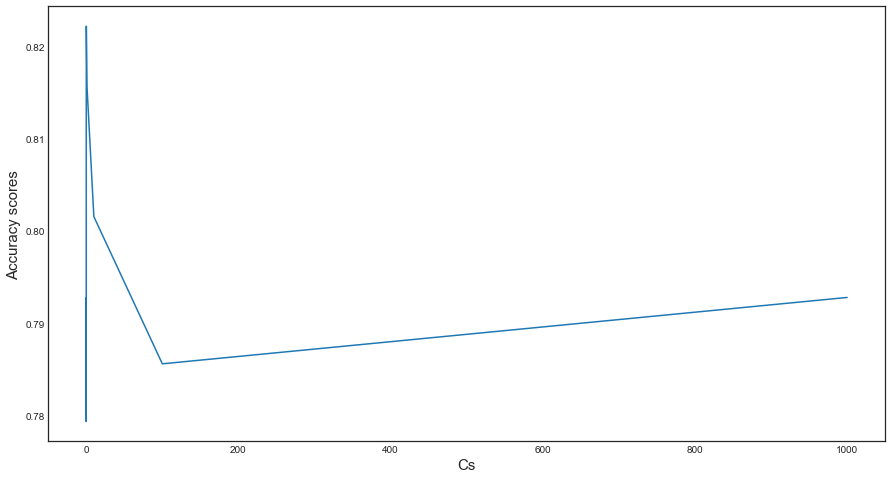

In [9]:
plt.figure(figsize = (15,8)) 
plt.plot(Cs, scores)
plt.xlabel("Cs", fontsize = 15)
plt.ylabel("Accuracy scores", fontsize = 15)
plt.show()

In [10]:
optimal_c = logreg_cv.C_
optimal_c = optimal_c[0]

print("Optimal C is:", optimal_c)
print("Corresponding accuracy is:", logreg_cv.score(X_train, y_train))

Optimal C is: 10.0
Corresponding accuracy is: 0.834375


## Problem 1.2

In [11]:
optimal_c

10.0

In [12]:
logreg_model = LogisticRegression(C = optimal_c)
logreg_model.fit(X_train, y_train)
logreg_model_train_score = logreg_model.score(X_train, y_train)
logreg_model_test_score = logreg_model.score(X_test, y_test)

print("Logistic Regression train score:", logreg_model_train_score)
print("Logistic Regression test score:", logreg_model_test_score)

Logistic Regression train score: 0.834375
Logistic Regression test score: 0.825


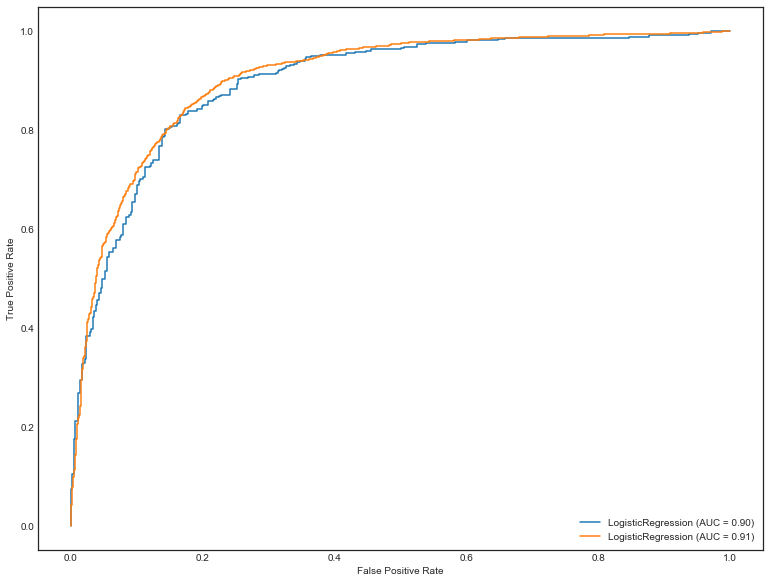

In [13]:
fig = plt.figure(figsize = (13, 10))
ax = plt.gca()
logreg_disp_test = plot_roc_curve(logreg_model, X_test, y_test, ax = ax)
logreg_disp_train = plot_roc_curve(logreg_model, X_train, y_train, ax = ax)
plt.show()

The orange line shows the ROC curve of the training set, and the blue line shows the ROC curve of the test set. We can clearly see that the model on the training set performs slightly better compared to the test set, and may result to have a higher True-Positive-Rate in some of the parts of our dataset which can be clearly seen in the graph.

We can see that we have also the AUC for each of the sets. As the training set has a higher AUC (0.91), compared to the test set (0.90), the following measures prove that training set performs more efficiently on the model compared to the test set by proving that TPR is higher for the training set.

In [14]:
logreg_pred_test = logreg_model.predict(X_test)
logreg_pred_train = logreg_model.predict(X_train)

print("Test Classification Report")
print(classification_report(y_test, logreg_pred_test))
print("Train Classification Report")
print(classification_report(y_train, logreg_pred_train))

Test Classification Report
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       417
           1       0.82      0.81      0.82       383

    accuracy                           0.82       800
   macro avg       0.82      0.82      0.82       800
weighted avg       0.82      0.82      0.82       800

Train Classification Report
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1595
           1       0.83      0.84      0.84      1605

    accuracy                           0.83      3200
   macro avg       0.83      0.83      0.83      3200
weighted avg       0.83      0.83      0.83      3200



Test

From the classification report we can see that 83% (precision) of the first class were classified correctly, recall of the first class shows that the model identified 84% of all first class samples of the test data. Precision of the second class shows that 82% of the second class was classified correctly and the recall states that 81% of all second class samples were correctly identified by the model.

We can see that the test set is balanced in the "support" column of the report, since the number of 0's is 417 and the number of 1's is 383 (numbers are pretty close to each other).

Train

84% (precision) of the first class were classified correctly, recall of the first class shows that the model identified 82% of all first class samples of the train data. Precision of the second class shows that 83% of the second class was classified correctly and the recall states that 84% of all second class samples were correctly identified by the model.

We can see that the train set is balanced in the "support" column of the report, since the number of 0's is 1595 and the number of 1's is 1605.

Overall, we can conclude that model works pretty well, since the measures of the classification report for both sets are quite similar, which proves that the test of our model validates the good performance.

## Problem 2.1

In [15]:
𝑋, 𝑦 = 𝑚𝑎𝑘𝑒_𝑏𝑙𝑜𝑏𝑠(𝑛_𝑠𝑎𝑚𝑝𝑙𝑒𝑠 = [5000,300,150], 𝑛_𝑓𝑒𝑎𝑡𝑢𝑟𝑒𝑠 = 10,
𝑟𝑎𝑛𝑑𝑜𝑚_𝑠𝑡𝑎𝑡𝑒 = 3, 𝑐𝑙𝑢𝑠𝑡𝑒𝑟_𝑠𝑡𝑑 = [6, 3, 5])

In [16]:
data = pd.DataFrame(data = np.c_[X, y])
data.columns = np.array(["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "Response"])
data.Response = pd.to_numeric(data.Response, downcast = "signed")
data.head()

,A,B,C,D,E,F,G,H,I,J,Response
0,-8.487996,-4.321813,3.355609,-5.578995,3.480476,0.585027,-11.336449,0.357398,-3.070621,-0.442660,1
1,-0.299406,-0.578555,2.302235,-4.243380,4.448448,7.572241,-6.718634,-5.910549,-21.337506,-6.173980,0
2,-3.015450,3.347927,-8.032663,-1.775816,12.249013,3.394724,-3.968544,2.095373,-11.924165,-6.141182,0
3,2.944445,3.678646,-9.210053,-2.164280,9.875881,17.978045,-7.694779,-1.730858,-11.250899,-0.333929,0
4,7.675109,-2.940357,-6.610237,-4.481804,17.449865,9.206010,-9.984137,-11.632799,-4.316605,-10.162515,0


In [17]:
y = data.Response
X = data.drop(["Response"], axis = 1)

X.shape, y.shape

((5450, 10), (5450,))

In [18]:
y.value_counts()

0    5000
1     300
2     150
Name: Response, dtype: int64

In [19]:
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X, y)
lda_model_score = lda_model.score(X, y)

print("LDA model score:", lda_model_score)

LDA model score: 0.9743119266055046


In [20]:
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X, y)
qda_model_score = qda_model.score(X, y)

print("QDA model score:", qda_model_score)

QDA model score: 0.9829357798165138


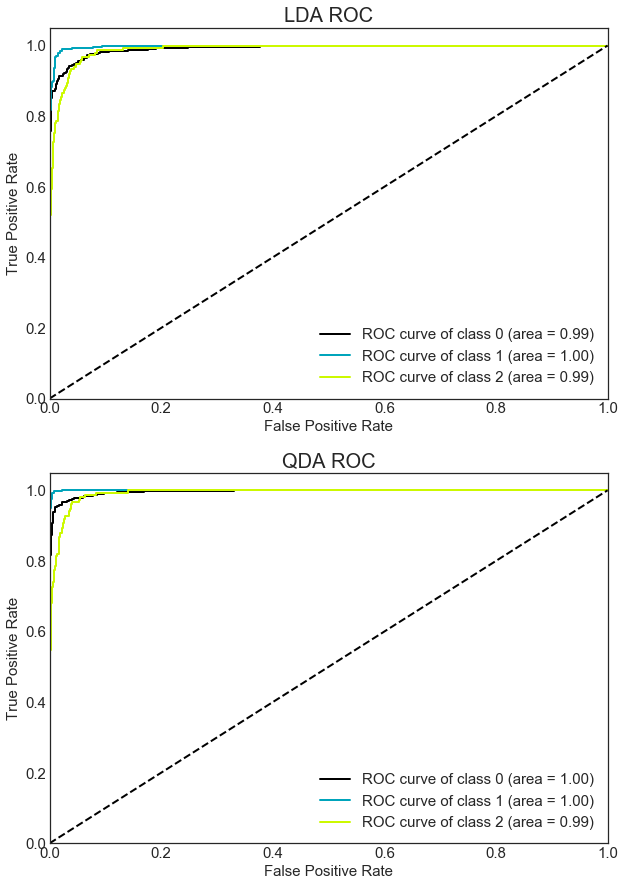

In [21]:
y_probs_lda = lda_model.predict_proba(X)
y_probs_qda = qda_model.predict_proba(X)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (10, 15))

ax1 = plot_roc(y, y_probs_lda, figsize = (8, 7), title_fontsize = 20,
         text_fontsize = 15, plot_micro = False, plot_macro = False, ax = ax1, title = "LDA ROC")

ax2 = plot_roc(y, y_probs_qda, figsize = (8, 7), title_fontsize = 20,
         text_fontsize = 15, plot_micro = False, plot_macro = False, ax = ax2, title = "QDA ROC")
plt.show()

In [22]:
lda_proba = lda_model.predict_proba(X)
qda_proba = qda_model.predict_proba(X)

lda_auc = roc_auc_score(y, lda_proba, multi_class = "ovr")
qda_auc = roc_auc_score(y, qda_proba, multi_class = "ovr")

print("LDA AUC:", lda_auc)
print("QDA AUC:", qda_auc)
print("LDA model score:", lda_model_score)
print("QDA model score:", qda_model_score)

LDA AUC: 0.9928371176378796
QDA AUC: 0.9959785110283391
LDA model score: 0.9743119266055046
QDA model score: 0.9829357798165138


Above we can see AUC's and scores of the both models. We can see that QDA has a slightly better AUC and accuracy, thus we conclude that QDA works best for the following problem in terms of accuracy and AUC. QDA is more flexible than LDA, which shows that for the following dataset having 10 features, due to the flexibility of QDA the model works better than LDA.

## Problem 2.2

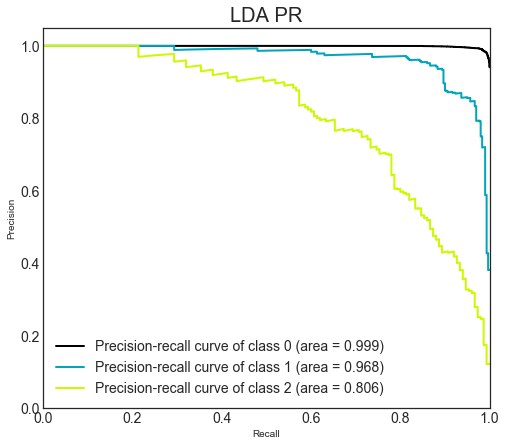

In [23]:
plot_precision_recall(y, lda_proba, figsize = (8, 7), title_fontsize = 20, text_fontsize = 14, plot_micro = False, title = "LDA PR")
plt.show()

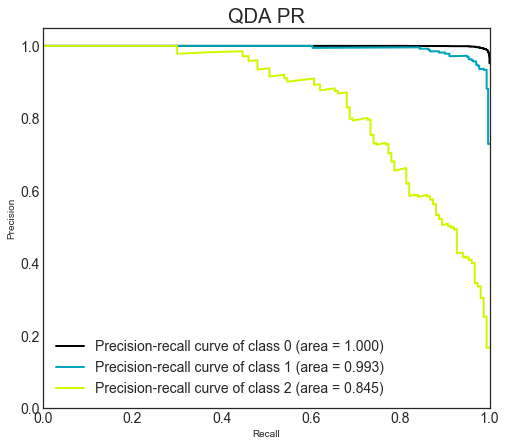

In [24]:
plot_precision_recall(y, qda_proba, figsize = (8, 7), title_fontsize = 20, text_fontsize = 14, plot_micro = False, title = "QDA PR")
plt.show()

In [25]:
y.value_counts()

0    5000
1     300
2     150
Name: Response, dtype: int64

Below we can see that for all classes QDA performs the best by comparing AUCPRs for each class. However, we see rather strange and big AUCPR on the both models for the class 0. Above cell clearly shows the reason for this strange behaviour. We can see that we have huge class imbalance problem, since 0 class has 5000 values, 1 has 300 and 2 has 150 values, which basically will lead to the bad recall score. We can tackle the following issue by assigning weights to the classes.

## Problem 3.1

In [26]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3200, 15)
X_test shape: (800, 15)
y_train shape: (3200,)
y_test shape: (800,)


In [27]:
k_value_list = np.arange(30) + 1
score_results_knn = []

for val in k_value_list:
    knn = KNeighborsClassifier(n_neighbors=val)
    kfold = KFold(n_splits=10)
    score = cross_val_score(knn, X_train, y_train, cv = kfold, scoring = "accuracy")
    score_results_knn.append(score)
    print("k val: %s, CV Score Avg: %s " % (val, np.mean(score)))

k val: 1, CV Score Avg: 0.7309375000000001 
k val: 2, CV Score Avg: 0.7184375 
k val: 3, CV Score Avg: 0.7762499999999999 
k val: 4, CV Score Avg: 0.7759375 
k val: 5, CV Score Avg: 0.795 
k val: 6, CV Score Avg: 0.7934374999999999 
k val: 7, CV Score Avg: 0.8015625 
k val: 8, CV Score Avg: 0.8015625 
k val: 9, CV Score Avg: 0.8015625 
k val: 10, CV Score Avg: 0.8103125 
k val: 11, CV Score Avg: 0.8112499999999999 
k val: 12, CV Score Avg: 0.8078125 
k val: 13, CV Score Avg: 0.8128124999999999 
k val: 14, CV Score Avg: 0.811875 
k val: 15, CV Score Avg: 0.8150000000000001 
k val: 16, CV Score Avg: 0.813125 
k val: 17, CV Score Avg: 0.8162499999999999 
k val: 18, CV Score Avg: 0.8153124999999999 
k val: 19, CV Score Avg: 0.8168749999999999 
k val: 20, CV Score Avg: 0.815625 
k val: 21, CV Score Avg: 0.8146875 
k val: 22, CV Score Avg: 0.8140625 
k val: 23, CV Score Avg: 0.8159375000000001 
k val: 24, CV Score Avg: 0.8143750000000001 
k val: 25, CV Score Avg: 0.8137500000000001 
k val: 2

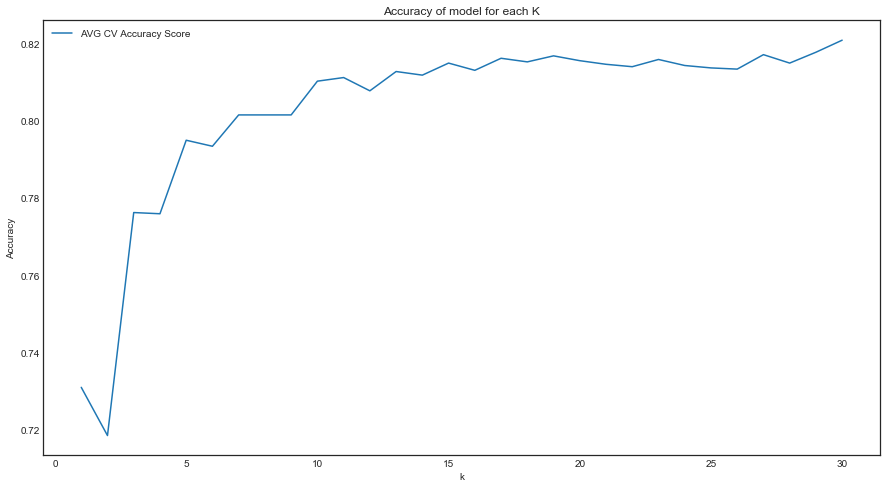

In [28]:
plt.figure(figsize = (15,8)) 
plt.plot(k_value_list, np.mean(np.array(score_results_knn), axis = 1), label = "AVG CV Accuracy Score")
plt.title("Accuracy of model for each K")
plt.xlabel("k")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

In [29]:
avg_cv_scores_knn = np.mean(np.array(score_results_knn), axis = 1)
max_avg_accuracy_index_knn = np.argmax(avg_cv_scores_knn) 

print("Optimal Value of k: %s" % k_value_list[max_avg_accuracy_index_knn]) 
print("Accuracy: %0.2f" % np.mean(score_results_knn[max_avg_accuracy_index_knn]))

Optimal Value of k: 30
Accuracy: 0.82


## Problem 3.2

In [30]:
knn_optimal = KNeighborsClassifier(n_neighbors = k_value_list[max_avg_accuracy_index_knn])

knn_optimal.fit(X_train, y_train)

train_score = knn_optimal.score(X_train, y_train)
test_score = knn_optimal.score(X_test, y_test)

print("Train score:", train_score)
print("Test score:", test_score)

Train score: 0.8275
Test score: 0.81375


In [31]:
knn_train_pred = knn_optimal.predict(X_train)
knn_test_pred = knn_optimal.predict(X_test)

print(classification_report(y_train, knn_train_pred))
print(classification_report(y_test, knn_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82      1595
           1       0.82      0.85      0.83      1605

    accuracy                           0.83      3200
   macro avg       0.83      0.83      0.83      3200
weighted avg       0.83      0.83      0.83      3200

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       417
           1       0.81      0.80      0.81       383

    accuracy                           0.81       800
   macro avg       0.81      0.81      0.81       800
weighted avg       0.81      0.81      0.81       800



We can see the train accuracy of 0.83 and test accuracy of 0.81 from the above cell. Also, comparing the classification reports for the both sets, we can conclude that the model works similar for both cases, since the metrics from the table are close to each other.

## Problem 3.3

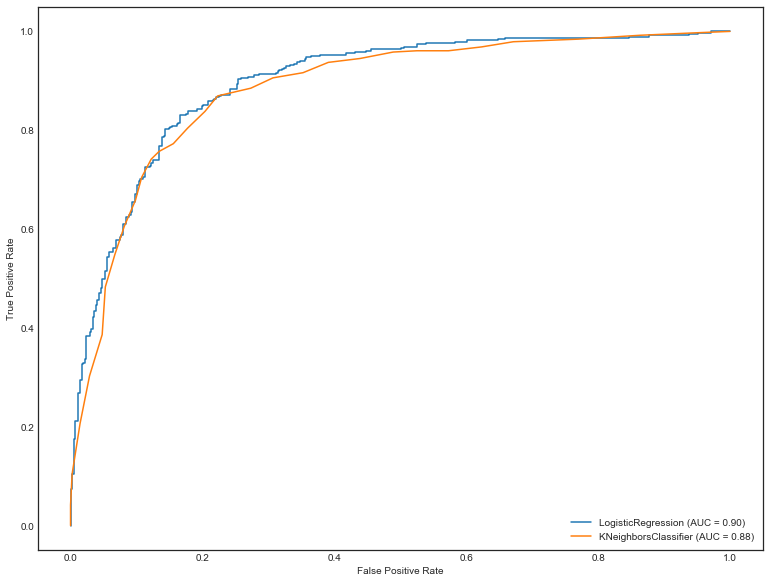

In [32]:
fig = plt.figure(figsize = (13, 10))
ax = plt.gca()
logreg_disp_test = plot_roc_curve(logreg_model, X_test, y_test, ax = ax)
knn_disp = plot_roc_curve(knn_optimal, X_test, y_test, ax = ax)
plt.show()

From this overall ROC curve, we can conclude that Logistic Regression works more efficiently for the following dataset, since it has an AUC of 0.90 and KNN has an AUC of 0.88.

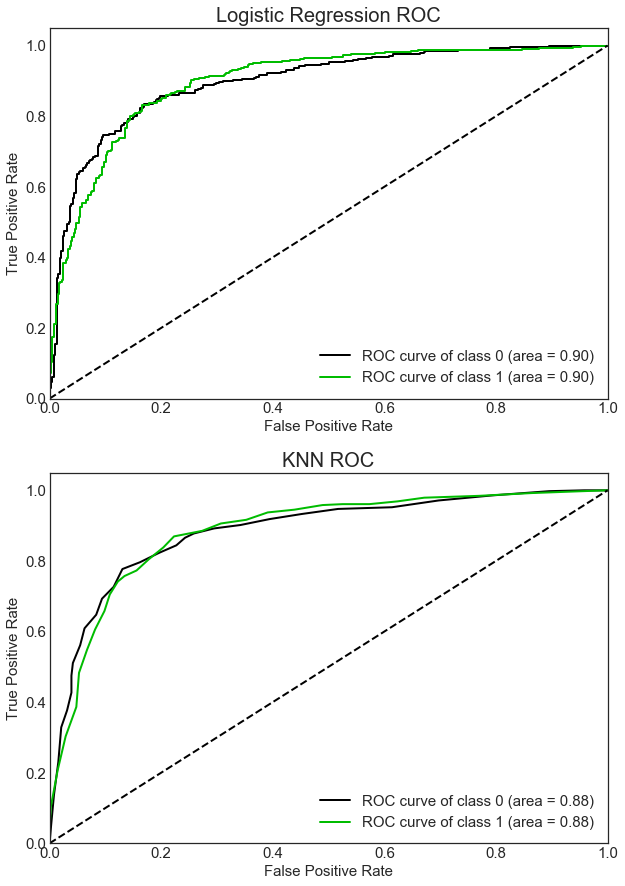

In [33]:
y_probs_logreg = logreg_model.predict_proba(X_test)
y_probs_knn = knn_optimal.predict_proba(X_test)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (10, 15))

ax1 = plot_roc(y_test, y_probs_logreg, figsize = (8, 7), title_fontsize = 20,
         text_fontsize = 15, plot_micro = False, plot_macro = False, ax = ax1, title = "Logistic Regression ROC")

ax2 = plot_roc(y_test, y_probs_knn, figsize = (8, 7), title_fontsize = 20,
         text_fontsize = 15, plot_micro = False, plot_macro = False, ax = ax2, title = "KNN ROC")
plt.show()

From the above ROC curves we can state that the Logistic Regression and KNN are working pretty much same for both of the classes. However, comparing to each other, we can see that Logistic Regression performs well for the both classes and has a better True-Positive-Rate for 0 and 1 (AUC for 0: 0.90, AUC for 1: 0.90) compared with the KNN (AUC for 0: 0.88, AUC for 1: 0.88)

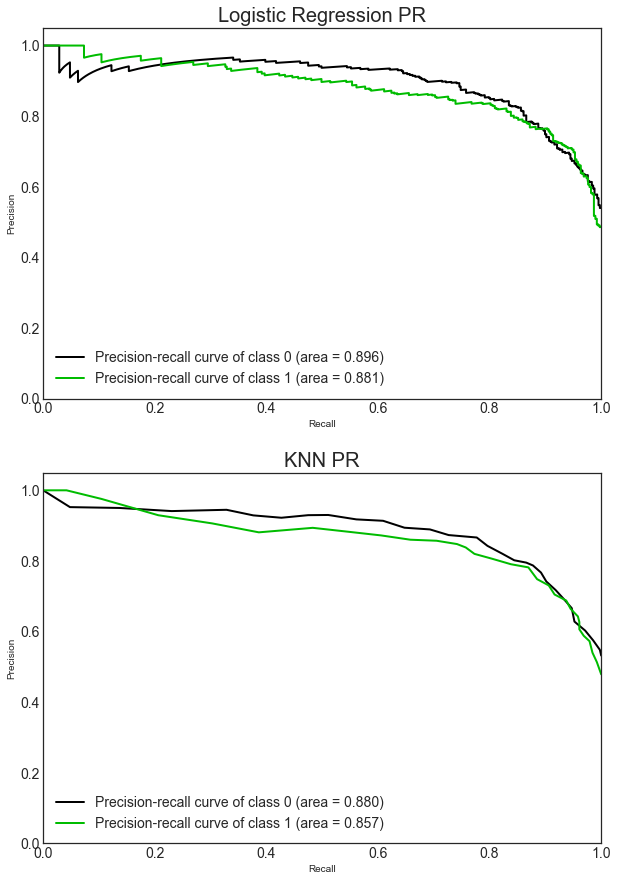

In [34]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (10, 15))

ax1 = plot_precision_recall(y_test, y_probs_logreg,
                            figsize = (8, 7),
                            title_fontsize = 20,
                            text_fontsize = 14,
                            plot_micro = False,
                            title = "Logistic Regression PR", ax = ax1)

ax2 = plot_precision_recall(y_test, y_probs_knn,
                            figsize = (8, 7),
                            title_fontsize = 20,
                            text_fontsize = 14,
                            plot_micro = False,
                            title = "KNN PR", ax = ax2)
plt.show()

From the PR curves above, we can conclude that overall Logistic Regression has a better performance, since it catches higher precision than KNN.

From the AUCPRs, we can see that for the class 0 both models work almost the same, since Logistic Regression has an AUCPR for 0 class of 0.896 and KNN has AUCPR for the same class of 0.880. However, we can see slight improvement of the Logistic Regression, which has a better AUCPR of 0.88 compared with the KNN AUCPR of 0.857 for the class 1.

To sum up, from all above measurements we can conclude that Logistic Regression is the best approach for the following dataset, while comparing the results obtained on the test set.